In [1]:
from functools import lru_cache
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

@lru_cache(maxsize=None)  
def fetch_data_from_source(file):
    '''
    Files:
        f1sim-data-2022.parquet
        f1sim-data-2023.parquet
        
        f1sim-data-dictionary.xlsx
        
        f1sim-ref-left.csv
        f1sim-ref-line.csv
        f1sim-ref-right.csv
        f1sim-ref-turns.csv
    '''
    if file.split(".")[1] == "parquet":
        df = pd.read_parquet(f"https://data3001-racing.s3.ap-southeast-2.amazonaws.com/{file}")
    elif file.split(".")[1] == "csv":
        df = pd.read_csv(f"https://data3001-racing.s3.ap-southeast-2.amazonaws.com/{file}")
    elif file.split(".")[1] == "xlsx":
        df = pd.read_excel(f"https://data3001-racing.s3.ap-southeast-2.amazonaws.com/{file}") 
    return df

In [2]:
left = fetch_data_from_source('f1sim-ref-left.csv')
right = fetch_data_from_source('f1sim-ref-right.csv')
line = fetch_data_from_source('f1sim-ref-line.csv')
turns = fetch_data_from_source('f1sim-ref-turns.csv')

In [3]:
df_2022 = fetch_data_from_source('f1sim-data-2022.parquet')
df_2023 = fetch_data_from_source('f1sim-data-2023.parquet')
df = pd.concat([df_2022, df_2023])

In [4]:
df

,SESSION_IDENTIFIER,FRAME,LAP_NUM,SECTOR,LAP_DISTANCE,CURRENT_LAP_TIME_MS,SECTOR_1_TIME_MS,SECTOR_2_TIME_MS,LAP_TIME_MS,SECTOR_3_MS,SPEED_KPH,THROTTLE,BRAKE,GEAR,ENGINE_RPM,STEERING,YAW,PITCH,ROLL,WORLDPOSX,WORLDPOSY,WORLDPOSZ,WORLDFORWARDDIRX,WORLDFORWARDDIRY,WORLDFORWARDDIRZ,WORLDRIGHTDIRX,WORLDRIGHTDIRY,WORLDRIGHTDIRZ
0,1.004555e+19,1403,1,0,243.045959,2844,29433,18320,86008.0,38255.0,315.0,1.000000,0.000000,8.0,10884.0,-0.014145,-2.312143,0.000380,-0.023934,287.412811,298.471619,1.760029,-24167.0,-12.0,-22126.0,22120.0,784.0,-24160.0
1,1.004555e+19,1408,1,0,266.444916,3111,29433,18320,86008.0,38255.0,314.0,0.350332,0.128359,8.0,10783.0,0.044816,-2.326019,-0.003212,-0.021614,304.667603,282.659576,1.781548,-23858.0,105.0,-22460.0,22456.0,708.0,-23851.0
2,1.004555e+19,1416,1,0,297.438477,3486,29433,18320,86008.0,38255.0,278.0,0.000000,0.636988,8.0,9431.0,-0.008652,-2.343246,-0.003103,-0.018019,326.941986,261.094025,1.882867,-23467.0,101.0,-22867.0,22865.0,590.0,-23462.0
3,1.004555e+19,1418,1,0,306.238770,3603,29433,18320,86008.0,38255.0,264.0,0.079118,0.818173,7.0,10505.0,-0.005997,-2.338133,-0.005251,-0.015977,333.254730,254.958725,1.920085,-23584.0,172.0,-22747.0,22746.0,523.0,-23579.0
4,1.004555e+19,1470,1,0,441.464752,6106,29433,18320,86008.0,38255.0,165.0,0.786557,0.000000,4.0,10425.0,-0.199542,2.821733,0.004594,-0.012085,370.639648,141.009048,2.337044,10302.0,-150.0,-31104.0,31103.0,395.0,10300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134119,9.922656e+18,5433,2,2,5075.787109,99530,36499,22353,102385.0,43533.0,218.0,0.946700,0.000000,5.0,11547.0,0.013321,-2.338648,-0.004030,-0.029708,-32.176426,606.414673,3.035384,-23572.0,132.0,-22759.0,22752.0,973.0,-23559.0
1134120,9.922656e+18,5434,2,2,5078.836914,99580,36499,22353,102385.0,43533.0,219.0,0.953552,0.000000,5.0,11631.0,0.011490,-2.340864,-0.004268,-0.028951,-29.983286,604.296326,3.046007,-23522.0,139.0,-22811.0,22805.0,948.0,-23509.0
1134121,9.922656e+18,5435,2,2,5081.903320,99630,36499,22353,102385.0,43533.0,221.0,0.952499,0.000000,5.0,11715.0,0.010300,-2.342981,-0.003934,-0.029038,-27.781626,602.161499,3.057615,-23473.0,128.0,-22861.0,22854.0,951.0,-23461.0
1134122,9.922656e+18,5436,2,2,5084.995117,99680,36499,22353,102385.0,43533.0,222.0,0.954086,0.000000,5.0,11792.0,0.007095,-2.344869,-0.003498,-0.030296,-25.566910,600.005432,3.067509,-23430.0,114.0,-22905.0,22897.0,992.0,-23417.0


#### Looking into the number of clusters there are



In [5]:
# Aggregate each session and see the total time taken and the final speed 
grouped = df.groupby('SESSION_IDENTIFIER')
result = grouped["SPEED_KPH"].last()
result

SESSION_IDENTIFIER
5.892042e+16    293.0
9.718583e+16    307.0
1.221455e+17    294.0
1.773021e+17    221.0
1.807268e+17    295.0
                ...  
1.814739e+19    267.0
1.822200e+19    290.0
1.834959e+19    298.0
1.839489e+19    294.0
1.843892e+19    161.0
Name: SPEED_KPH, Length: 513, dtype: float64

In [6]:
# Bruh why tf didn't my other way work wateva
condition = (df['SESSION_IDENTIFIER'] == df["SESSION_IDENTIFIER"][1134119]) & (df["SECTOR"] == 0) & (df["LAP_NUM"] == 1)
filtered_df = df[condition]
filtered_df

,SESSION_IDENTIFIER,FRAME,LAP_NUM,SECTOR,LAP_DISTANCE,CURRENT_LAP_TIME_MS,SECTOR_1_TIME_MS,SECTOR_2_TIME_MS,LAP_TIME_MS,SECTOR_3_MS,SPEED_KPH,THROTTLE,BRAKE,GEAR,ENGINE_RPM,STEERING,YAW,PITCH,ROLL,WORLDPOSX,WORLDPOSY,WORLDPOSZ,WORLDFORWARDDIRX,WORLDFORWARDDIRY,WORLDFORWARDDIRZ,WORLDRIGHTDIRX,WORLDRIGHTDIRY,WORLDRIGHTDIRZ
1129944,9.922656e+18,1134,1,0,0.829180,0,37774,24584,114713.0,52355.0,238.0,0.697093,0.0,6.0,10864.0,-0.005447,-2.343043,0.003263,-0.025875,112.347389,465.791809,2.916163,-23472.0,-106.0,-22862.0,22853.0,847.0,-23466.0
1129945,9.922656e+18,1135,1,0,4.153554,50,37774,24584,114713.0,52355.0,239.0,0.697093,0.0,6.0,10886.0,-0.003159,-2.341998,0.005425,-0.026231,114.729469,463.471588,2.899239,-23496.0,-177.0,-22838.0,22827.0,859.0,-23491.0
1129946,9.922656e+18,1136,1,0,7.487041,100,37774,24584,114713.0,52355.0,240.0,0.697093,0.0,6.0,10906.0,-0.006546,-2.341134,0.005946,-0.025837,117.120445,461.147430,2.877810,-23515.0,-194.0,-22817.0,22806.0,846.0,-23511.0
1129947,9.922656e+18,1137,1,0,10.846199,150,37774,24584,114713.0,52355.0,240.0,0.697093,0.0,6.0,10931.0,-0.005722,-2.340055,0.005916,-0.024912,119.532570,458.808258,2.856799,-23540.0,-193.0,-22792.0,22782.0,816.0,-23536.0
1129948,9.922656e+18,1138,1,0,14.192823,200,37774,24584,114713.0,52355.0,241.0,0.697093,0.0,6.0,10954.0,-0.003708,-2.338959,0.005229,-0.025523,121.938065,456.480347,2.836730,-23565.0,-171.0,-22766.0,22756.0,836.0,-23561.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130675,9.922656e+18,1885,1,0,1751.283936,37554,37774,24584,114713.0,52355.0,190.0,0.351446,0.0,4.0,11478.0,-0.024857,2.021837,0.000036,0.008687,374.164276,-807.972900,3.238739,29490.0,-1.0,-14283.0,14282.0,-284.0,29488.0
1130676,9.922656e+18,1886,1,0,1753.922241,37604,37774,24584,114713.0,52355.0,190.0,0.202106,0.0,4.0,11419.0,-0.023392,2.025537,0.000784,0.004609,371.782227,-809.129028,3.235752,29437.0,-25.0,-14392.0,14391.0,-151.0,29436.0
1130677,9.922656e+18,1887,1,0,1756.560913,37654,37774,24584,114713.0,52355.0,190.0,0.000000,0.0,4.0,11334.0,-0.019638,2.029158,0.001878,0.000194,369.403656,-810.293335,3.230942,29384.0,-61.0,-14498.0,14498.0,-6.0,29384.0
1130678,9.922656e+18,1888,1,0,1759.192017,37704,37774,24584,114713.0,52355.0,189.0,0.000000,0.0,4.0,11296.0,-0.015427,2.032368,0.002542,-0.004520,367.035461,-811.461914,3.223430,29337.0,-83.0,-14592.0,14593.0,148.0,29337.0


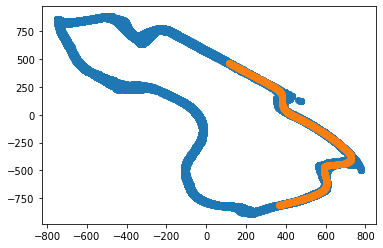

In [7]:
plt.scatter(df["WORLDPOSX"], df["WORLDPOSY"])
plt.scatter(filtered_df["WORLDPOSX"], filtered_df["WORLDPOSY"])

In [8]:
filtered_df

,SESSION_IDENTIFIER,FRAME,LAP_NUM,SECTOR,LAP_DISTANCE,CURRENT_LAP_TIME_MS,SECTOR_1_TIME_MS,SECTOR_2_TIME_MS,LAP_TIME_MS,SECTOR_3_MS,SPEED_KPH,THROTTLE,BRAKE,GEAR,ENGINE_RPM,STEERING,YAW,PITCH,ROLL,WORLDPOSX,WORLDPOSY,WORLDPOSZ,WORLDFORWARDDIRX,WORLDFORWARDDIRY,WORLDFORWARDDIRZ,WORLDRIGHTDIRX,WORLDRIGHTDIRY,WORLDRIGHTDIRZ
1129944,9.922656e+18,1134,1,0,0.829180,0,37774,24584,114713.0,52355.0,238.0,0.697093,0.0,6.0,10864.0,-0.005447,-2.343043,0.003263,-0.025875,112.347389,465.791809,2.916163,-23472.0,-106.0,-22862.0,22853.0,847.0,-23466.0
1129945,9.922656e+18,1135,1,0,4.153554,50,37774,24584,114713.0,52355.0,239.0,0.697093,0.0,6.0,10886.0,-0.003159,-2.341998,0.005425,-0.026231,114.729469,463.471588,2.899239,-23496.0,-177.0,-22838.0,22827.0,859.0,-23491.0
1129946,9.922656e+18,1136,1,0,7.487041,100,37774,24584,114713.0,52355.0,240.0,0.697093,0.0,6.0,10906.0,-0.006546,-2.341134,0.005946,-0.025837,117.120445,461.147430,2.877810,-23515.0,-194.0,-22817.0,22806.0,846.0,-23511.0
1129947,9.922656e+18,1137,1,0,10.846199,150,37774,24584,114713.0,52355.0,240.0,0.697093,0.0,6.0,10931.0,-0.005722,-2.340055,0.005916,-0.024912,119.532570,458.808258,2.856799,-23540.0,-193.0,-22792.0,22782.0,816.0,-23536.0
1129948,9.922656e+18,1138,1,0,14.192823,200,37774,24584,114713.0,52355.0,241.0,0.697093,0.0,6.0,10954.0,-0.003708,-2.338959,0.005229,-0.025523,121.938065,456.480347,2.836730,-23565.0,-171.0,-22766.0,22756.0,836.0,-23561.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130675,9.922656e+18,1885,1,0,1751.283936,37554,37774,24584,114713.0,52355.0,190.0,0.351446,0.0,4.0,11478.0,-0.024857,2.021837,0.000036,0.008687,374.164276,-807.972900,3.238739,29490.0,-1.0,-14283.0,14282.0,-284.0,29488.0
1130676,9.922656e+18,1886,1,0,1753.922241,37604,37774,24584,114713.0,52355.0,190.0,0.202106,0.0,4.0,11419.0,-0.023392,2.025537,0.000784,0.004609,371.782227,-809.129028,3.235752,29437.0,-25.0,-14392.0,14391.0,-151.0,29436.0
1130677,9.922656e+18,1887,1,0,1756.560913,37654,37774,24584,114713.0,52355.0,190.0,0.000000,0.0,4.0,11334.0,-0.019638,2.029158,0.001878,0.000194,369.403656,-810.293335,3.230942,29384.0,-61.0,-14498.0,14498.0,-6.0,29384.0
1130678,9.922656e+18,1888,1,0,1759.192017,37704,37774,24584,114713.0,52355.0,189.0,0.000000,0.0,4.0,11296.0,-0.015427,2.032368,0.002542,-0.004520,367.035461,-811.461914,3.223430,29337.0,-83.0,-14592.0,14593.0,148.0,29337.0


(array([228.,  22.,  32.,  64., 138.,  97.,  59.,  55.,  15.,  26.]),
 array([0.        , 0.09007859, 0.18015717, 0.27023576, 0.36031435,
        0.45039293, 0.54047152, 0.6305501 , 0.72062869, 0.81070728,
        0.90078586]),
 <BarContainer object of 10 artists>)

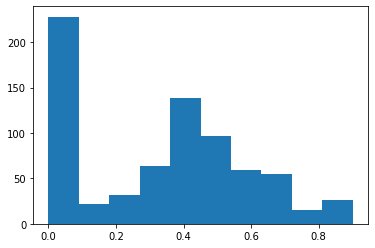

In [9]:
plt.hist(filtered_df["THROTTLE"])

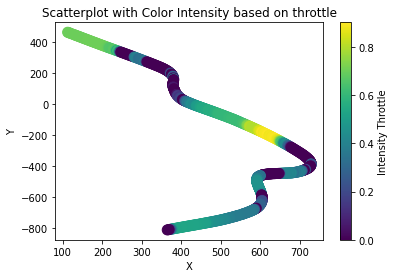

In [10]:
plt.scatter(filtered_df["WORLDPOSX"], filtered_df["WORLDPOSY"], c=filtered_df["THROTTLE"], cmap='viridis', s=100)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatterplot with Color Intensity based on throttle')
plt.colorbar(label='Intensity Throttle')
plt.show()

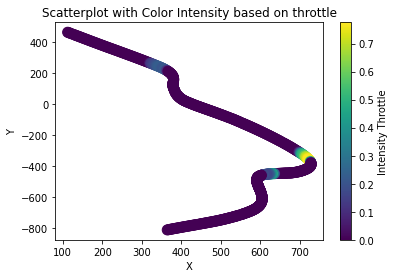

In [11]:
plt.scatter(filtered_df["WORLDPOSX"], filtered_df["WORLDPOSY"], c=filtered_df["BRAKE"], cmap='viridis', s=100)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatterplot with Color Intensity based on throttle')
plt.colorbar(label='Intensity Throttle')
plt.show()

In [12]:
# TESTING :) 

We found what we are looking for, so we can double down and look at only sector 0 

We also:

- Assume each lap is independent so we shouldn't aggregate on just the session identifier

## Legit part start

In [13]:
df_2022 = fetch_data_from_source('f1sim-data-2022.parquet')
df_2023 = fetch_data_from_source('f1sim-data-2023.parquet')
df = pd.concat([df_2022, df_2023])

df['agg'] = df['SESSION_IDENTIFIER'].astype(str) + '_' + df['LAP_NUM'].astype(str)

condition = (df["SECTOR"] == 0)
df = df[condition]
df

,SESSION_IDENTIFIER,FRAME,LAP_NUM,SECTOR,LAP_DISTANCE,CURRENT_LAP_TIME_MS,SECTOR_1_TIME_MS,SECTOR_2_TIME_MS,LAP_TIME_MS,SECTOR_3_MS,SPEED_KPH,THROTTLE,BRAKE,GEAR,ENGINE_RPM,STEERING,YAW,PITCH,ROLL,WORLDPOSX,WORLDPOSY,WORLDPOSZ,WORLDFORWARDDIRX,WORLDFORWARDDIRY,WORLDFORWARDDIRZ,WORLDRIGHTDIRX,WORLDRIGHTDIRY,WORLDRIGHTDIRZ,agg
0,1.004555e+19,1403,1,0,243.045959,2844,29433,18320,86008.0,38255.0,315.0,1.000000,0.000000,8.0,10884.0,-0.014145,-2.312143,0.000380,-0.023934,287.412811,298.471619,1.760029,-24167.0,-12.0,-22126.0,22120.0,784.0,-24160.0,1.0045550089308107e+19_1
1,1.004555e+19,1408,1,0,266.444916,3111,29433,18320,86008.0,38255.0,314.0,0.350332,0.128359,8.0,10783.0,0.044816,-2.326019,-0.003212,-0.021614,304.667603,282.659576,1.781548,-23858.0,105.0,-22460.0,22456.0,708.0,-23851.0,1.0045550089308107e+19_1
2,1.004555e+19,1416,1,0,297.438477,3486,29433,18320,86008.0,38255.0,278.0,0.000000,0.636988,8.0,9431.0,-0.008652,-2.343246,-0.003103,-0.018019,326.941986,261.094025,1.882867,-23467.0,101.0,-22867.0,22865.0,590.0,-23462.0,1.0045550089308107e+19_1
3,1.004555e+19,1418,1,0,306.238770,3603,29433,18320,86008.0,38255.0,264.0,0.079118,0.818173,7.0,10505.0,-0.005997,-2.338133,-0.005251,-0.015977,333.254730,254.958725,1.920085,-23584.0,172.0,-22747.0,22746.0,523.0,-23579.0,1.0045550089308107e+19_1
4,1.004555e+19,1470,1,0,441.464752,6106,29433,18320,86008.0,38255.0,165.0,0.786557,0.000000,4.0,10425.0,-0.199542,2.821733,0.004594,-0.012085,370.639648,141.009048,2.337044,10302.0,-150.0,-31104.0,31103.0,395.0,10300.0,1.0045550089308107e+19_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132880,9.922656e+18,4159,2,0,1749.684570,36286,36499,22353,102385.0,43533.0,225.0,0.675456,0.000000,5.0,11740.0,-0.001419,2.023741,-0.000328,0.005214,375.733337,-807.596863,3.237786,29462.0,10.0,-14339.0,14339.0,-170.0,29462.0,9.922655568079577e+18_2
1132881,9.922656e+18,4160,2,0,1752.812012,36336,36499,22353,102385.0,43533.0,225.0,0.675456,0.000000,5.0,11770.0,-0.003433,2.023917,-0.000076,-0.000536,372.910522,-808.969299,3.234098,29460.0,2.0,-14344.0,14344.0,17.0,29460.0,9.922655568079577e+18_2
1132882,9.922656e+18,4161,2,0,1755.945312,36386,36499,22353,102385.0,43533.0,226.0,0.675456,0.000000,5.0,11800.0,-0.004623,2.024389,0.001002,-0.005583,370.083557,-810.344543,3.229301,29453.0,-32.0,-14358.0,14358.0,182.0,29453.0,9.922655568079577e+18_2
1132883,9.922656e+18,4162,2,0,1759.090332,36436,36499,22353,102385.0,43533.0,227.0,0.675456,0.000000,5.0,11830.0,-0.010483,2.025251,0.002325,-0.009760,367.247559,-811.726196,3.220385,29441.0,-76.0,-14383.0,14383.0,319.0,29439.0,9.922655568079577e+18_2


## Filter out the sector

- Finding where the acceleration happens and plot them on the map

- Where the brakes are happening and plot them on the map 

- Understand where to cut off the data for the sector 0 turns 

In [14]:
# I only want the chicane in question (filtering using a grid)
df = df[(df["WORLDPOSX"] < 500) & (df["WORLDPOSX"] > 200) & (df["WORLDPOSY"] > -200)]
df

,SESSION_IDENTIFIER,FRAME,LAP_NUM,SECTOR,LAP_DISTANCE,CURRENT_LAP_TIME_MS,SECTOR_1_TIME_MS,SECTOR_2_TIME_MS,LAP_TIME_MS,SECTOR_3_MS,SPEED_KPH,THROTTLE,BRAKE,GEAR,ENGINE_RPM,STEERING,YAW,PITCH,ROLL,WORLDPOSX,WORLDPOSY,WORLDPOSZ,WORLDFORWARDDIRX,WORLDFORWARDDIRY,WORLDFORWARDDIRZ,WORLDRIGHTDIRX,WORLDRIGHTDIRY,WORLDRIGHTDIRZ,agg
0,1.004555e+19,1403,1,0,243.045959,2844,29433,18320,86008.0,38255.0,315.0,1.000000,0.000000,8.0,10884.0,-0.014145,-2.312143,0.000380,-0.023934,287.412811,298.471619,1.760029,-24167.0,-12.0,-22126.0,22120.0,784.0,-24160.0,1.0045550089308107e+19_1
1,1.004555e+19,1408,1,0,266.444916,3111,29433,18320,86008.0,38255.0,314.0,0.350332,0.128359,8.0,10783.0,0.044816,-2.326019,-0.003212,-0.021614,304.667603,282.659576,1.781548,-23858.0,105.0,-22460.0,22456.0,708.0,-23851.0,1.0045550089308107e+19_1
2,1.004555e+19,1416,1,0,297.438477,3486,29433,18320,86008.0,38255.0,278.0,0.000000,0.636988,8.0,9431.0,-0.008652,-2.343246,-0.003103,-0.018019,326.941986,261.094025,1.882867,-23467.0,101.0,-22867.0,22865.0,590.0,-23462.0,1.0045550089308107e+19_1
3,1.004555e+19,1418,1,0,306.238770,3603,29433,18320,86008.0,38255.0,264.0,0.079118,0.818173,7.0,10505.0,-0.005997,-2.338133,-0.005251,-0.015977,333.254730,254.958725,1.920085,-23584.0,172.0,-22747.0,22746.0,523.0,-23579.0,1.0045550089308107e+19_1
4,1.004555e+19,1470,1,0,441.464752,6106,29433,18320,86008.0,38255.0,165.0,0.786557,0.000000,4.0,10425.0,-0.199542,2.821733,0.004594,-0.012085,370.639648,141.009048,2.337044,10302.0,-150.0,-31104.0,31103.0,395.0,10300.0,1.0045550089308107e+19_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132418,9.922656e+18,3684,2,0,689.209473,12529,36499,22353,102385.0,43533.0,190.0,0.816358,0.000000,4.0,11755.0,0.018814,-2.310662,-0.004172,0.024050,490.463654,-55.154510,3.136417,-24200.0,136.0,-22090.0,22082.0,-787.0,-24195.0,9.922655568079577e+18_2
1132419,9.922656e+18,3685,2,0,691.874512,12579,36499,22353,102385.0,43533.0,192.0,0.826383,0.000000,4.0,11850.0,0.018357,-2.313687,-0.004460,0.023015,492.426453,-56.949917,3.147111,-24133.0,146.0,-22164.0,22155.0,-754.0,-24129.0,9.922655568079577e+18_2
1132420,9.922656e+18,3686,2,0,694.560547,12629,36499,22353,102385.0,43533.0,193.0,0.820569,0.000000,4.0,11934.0,0.018448,-2.316696,-0.004235,0.022687,494.399200,-58.764996,3.157917,-24066.0,138.0,-22236.0,22228.0,-743.0,-24062.0,9.922655568079577e+18_2
1132421,9.922656e+18,3687,2,0,697.262207,12679,36499,22353,102385.0,43533.0,194.0,0.842206,0.000000,5.0,10379.0,0.018906,-2.319804,-0.003499,0.022199,496.378113,-60.596397,3.167727,-23997.0,114.0,-22311.0,22304.0,-727.0,-23993.0,9.922655568079577e+18_2


I found that at times the data didn't even enter the chicane like come on now.... 

So I have to filter for that, when the data actually enters and exits the chicane

In [15]:
# Filter for data entering, within and exiting 

ls = df["agg"].unique()
ls_legit = []

for elem in ls:
    new = df[df["agg"] == elem]
    
    entry = 0
    within = 0
    exit = 0
    
        
    for i, res in new.iterrows():
        if (res["WORLDPOSX"] < 350) & (res["WORLDPOSY"]>200):
            entry += 1
        if (350 < res["WORLDPOSX"] < 400) & (0 < res["WORLDPOSY"] < 200):
            within += 1
        if (res["WORLDPOSX"] > 400) & (res["WORLDPOSY"] < 100):
            exit += 1
    
    if (entry >= 1) & (within >= 1) & (exit >= 1):
        ls_legit.append(elem)
    
ls_legit

['1.0045550089308107e+19_1',
 '1.0045550089308107e+19_3',
 '1.004644701392172e+19_1',
 '1.004644701392172e+19_2',
 '1.004644701392172e+19_3',
 '1.014601560503485e+19_1',
 '1.0167661446319475e+19_1',
 '1.0167661446319475e+19_2',
 '1.020389177761665e+19_1',
 '1.020389177761665e+19_2',
 '1.020389177761665e+19_3',
 '1.0246088537086409e+19_1',
 '1.0246088537086409e+19_2',
 '1.0294831654124005e+18_1',
 '1.0303699680807342e+19_1',
 '1.0303699680807342e+19_2',
 '1.0303699680807342e+19_3',
 '1.035350535424165e+19_1',
 '1.035350535424165e+19_2',
 '1.035350535424165e+19_3',
 '1.0370910074670805e+19_1',
 '1.0370910074670805e+19_2',
 '1.0395982842815324e+19_1',
 '1.0395982842815324e+19_2',
 '1.0410830510086203e+19_1',
 '1.0410830510086203e+19_2',
 '1.0410830510086203e+19_3',
 '1.0454724100726356e+19_1',
 '1.0454724100726356e+19_2',
 '1.0454724100726356e+19_3',
 '1.0460916593459091e+19_1',
 '1.0460916593459091e+19_2',
 '1.050580033742233e+19_1',
 '1.050580033742233e+19_2',
 '1.050580033742233e+19_3'

In [16]:
# With the legit list

df = df[df['agg'].isin(ls_legit)]
df

,SESSION_IDENTIFIER,FRAME,LAP_NUM,SECTOR,LAP_DISTANCE,CURRENT_LAP_TIME_MS,SECTOR_1_TIME_MS,SECTOR_2_TIME_MS,LAP_TIME_MS,SECTOR_3_MS,SPEED_KPH,THROTTLE,BRAKE,GEAR,ENGINE_RPM,STEERING,YAW,PITCH,ROLL,WORLDPOSX,WORLDPOSY,WORLDPOSZ,WORLDFORWARDDIRX,WORLDFORWARDDIRY,WORLDFORWARDDIRZ,WORLDRIGHTDIRX,WORLDRIGHTDIRY,WORLDRIGHTDIRZ,agg
0,1.004555e+19,1403,1,0,243.045959,2844,29433,18320,86008.0,38255.0,315.0,1.000000,0.000000,8.0,10884.0,-0.014145,-2.312143,0.000380,-0.023934,287.412811,298.471619,1.760029,-24167.0,-12.0,-22126.0,22120.0,784.0,-24160.0,1.0045550089308107e+19_1
1,1.004555e+19,1408,1,0,266.444916,3111,29433,18320,86008.0,38255.0,314.0,0.350332,0.128359,8.0,10783.0,0.044816,-2.326019,-0.003212,-0.021614,304.667603,282.659576,1.781548,-23858.0,105.0,-22460.0,22456.0,708.0,-23851.0,1.0045550089308107e+19_1
2,1.004555e+19,1416,1,0,297.438477,3486,29433,18320,86008.0,38255.0,278.0,0.000000,0.636988,8.0,9431.0,-0.008652,-2.343246,-0.003103,-0.018019,326.941986,261.094025,1.882867,-23467.0,101.0,-22867.0,22865.0,590.0,-23462.0,1.0045550089308107e+19_1
3,1.004555e+19,1418,1,0,306.238770,3603,29433,18320,86008.0,38255.0,264.0,0.079118,0.818173,7.0,10505.0,-0.005997,-2.338133,-0.005251,-0.015977,333.254730,254.958725,1.920085,-23584.0,172.0,-22747.0,22746.0,523.0,-23579.0,1.0045550089308107e+19_1
4,1.004555e+19,1470,1,0,441.464752,6106,29433,18320,86008.0,38255.0,165.0,0.786557,0.000000,4.0,10425.0,-0.199542,2.821733,0.004594,-0.012085,370.639648,141.009048,2.337044,10302.0,-150.0,-31104.0,31103.0,395.0,10300.0,1.0045550089308107e+19_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132418,9.922656e+18,3684,2,0,689.209473,12529,36499,22353,102385.0,43533.0,190.0,0.816358,0.000000,4.0,11755.0,0.018814,-2.310662,-0.004172,0.024050,490.463654,-55.154510,3.136417,-24200.0,136.0,-22090.0,22082.0,-787.0,-24195.0,9.922655568079577e+18_2
1132419,9.922656e+18,3685,2,0,691.874512,12579,36499,22353,102385.0,43533.0,192.0,0.826383,0.000000,4.0,11850.0,0.018357,-2.313687,-0.004460,0.023015,492.426453,-56.949917,3.147111,-24133.0,146.0,-22164.0,22155.0,-754.0,-24129.0,9.922655568079577e+18_2
1132420,9.922656e+18,3686,2,0,694.560547,12629,36499,22353,102385.0,43533.0,193.0,0.820569,0.000000,4.0,11934.0,0.018448,-2.316696,-0.004235,0.022687,494.399200,-58.764996,3.157917,-24066.0,138.0,-22236.0,22228.0,-743.0,-24062.0,9.922655568079577e+18_2
1132421,9.922656e+18,3687,2,0,697.262207,12679,36499,22353,102385.0,43533.0,194.0,0.842206,0.000000,5.0,10379.0,0.018906,-2.319804,-0.003499,0.022199,496.378113,-60.596397,3.167727,-23997.0,114.0,-22311.0,22304.0,-727.0,-23993.0,9.922655568079577e+18_2


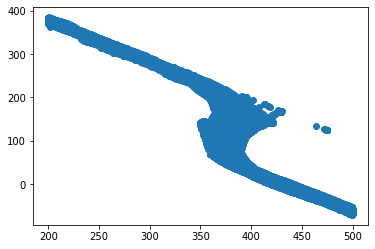

In [17]:
plt.scatter(df["WORLDPOSX"], df["WORLDPOSY"])

In [18]:
# Getting the final speed

grouped = df.groupby(["agg"])
result = grouped["SPEED_KPH"].last()

last_time = pd.DataFrame(result)
last_time

,SPEED_KPH
agg,
1.00346768666644e+19_1,264.0
1.00346768666644e+19_2,264.0
1.0045550089308107e+19_1,257.0
1.0045550089308107e+19_3,262.0
1.004644701392172e+19_1,261.0
...,...
9.93719767677717e+18_3,271.0
9.943356580072892e+18_1,274.0
9.943356580072892e+18_2,273.0


In [19]:
# Getting the total time of the chicane

grouped = df.groupby(["agg"])
result = grouped["CURRENT_LAP_TIME_MS"].last() - grouped["CURRENT_LAP_TIME_MS"].first()

time_sector0 = pd.DataFrame(result)
time_sector0

,CURRENT_LAP_TIME_MS
agg,
1.00346768666644e+19_1,9292
1.00346768666644e+19_2,9309
1.0045550089308107e+19_1,6890
1.0045550089308107e+19_3,8175
1.004644701392172e+19_1,9768
...,...
9.93719767677717e+18_3,8693
9.943356580072892e+18_1,8674
9.943356580072892e+18_2,8640


(array([605., 480.,  38.,  22.,  11.,   6.,   4.,   2.,   2.,   4.]),
 array([ 2486. ,  9581.4, 16676.8, 23772.2, 30867.6, 37963. , 45058.4,
        52153.8, 59249.2, 66344.6, 73440. ]),
 <BarContainer object of 10 artists>)

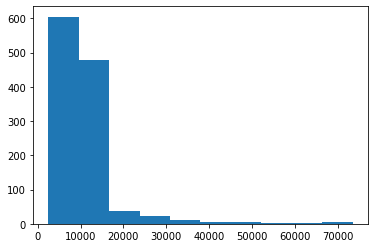

In [20]:
# Plot the data points 

plt.hist(time_sector0["CURRENT_LAP_TIME_MS"])

(array([  6.,   6.,  12.,  26.,  41.,  66., 114., 126., 222., 555.]),
 array([  7. ,  34.1,  61.2,  88.3, 115.4, 142.5, 169.6, 196.7, 223.8,
        250.9, 278. ]),
 <BarContainer object of 10 artists>)

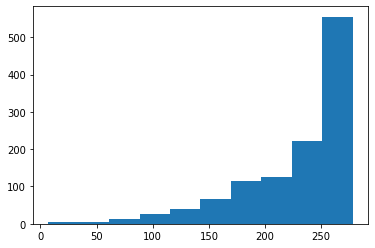

In [21]:
plt.hist(last_time["SPEED_KPH"])

## Define a metric that takes into account both the total time and the final speed

In [22]:
df_agg_total = pd.concat([time_sector0, last_time], axis = 1)
df_agg_total

,CURRENT_LAP_TIME_MS,SPEED_KPH
agg,,
1.00346768666644e+19_1,9292,264.0
1.00346768666644e+19_2,9309,264.0
1.0045550089308107e+19_1,6890,257.0
1.0045550089308107e+19_3,8175,262.0
1.004644701392172e+19_1,9768,261.0
...,...,...
9.93719767677717e+18_3,8693,271.0
9.943356580072892e+18_1,8674,274.0
9.943356580072892e+18_2,8640,273.0


In [23]:
# # Normalise the current lap times and speed
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# df_agg_total[['Normalized_CurrLapSpeed', 'Normalized_SpeedKPH']] = scaler.fit_transform(df_agg_total[['CURRENT_LAP_TIME_MS', "SPEED_KPH"]])
# df_agg_total

In [24]:
df_agg_total["Rank"] = -df_agg_total["CURRENT_LAP_TIME_MS"] + 40*df_agg_total["SPEED_KPH"]

In [25]:
df_agg_total = df_agg_total.sort_values(by='Rank', ascending=False)
df_agg_total

,CURRENT_LAP_TIME_MS,SPEED_KPH,Rank
agg,,,
9.443149153309372e+18_3,5055,245.0,4745.0
1.4054303838250777e+19_4,5864,265.0,4736.0
9.363995516070095e+18_2,5072,243.0,4648.0
4.486621736790789e+18_6,6356,273.0,4564.0
3.707949941588523e+18_3,5656,253.0,4464.0
...,...,...,...
2.9304924075958497e+18_3,68877,171.0,-62037.0
1.1747753342782466e+19_2,66651,92.0,-62971.0
1.6678340238825744e+19_1,71856,186.0,-64416.0


In [26]:
# We don't want data points that have invalid data for lap time and speed 
df_agg_total = df_agg_total[(df_agg_total != 0).all(1)]
df_agg_total

,CURRENT_LAP_TIME_MS,SPEED_KPH,Rank
agg,,,
9.443149153309372e+18_3,5055,245.0,4745.0
1.4054303838250777e+19_4,5864,265.0,4736.0
9.363995516070095e+18_2,5072,243.0,4648.0
4.486621736790789e+18_6,6356,273.0,4564.0
3.707949941588523e+18_3,5656,253.0,4464.0
...,...,...,...
2.9304924075958497e+18_3,68877,171.0,-62037.0
1.1747753342782466e+19_2,66651,92.0,-62971.0
1.6678340238825744e+19_1,71856,186.0,-64416.0


(array([605., 480.,  38.,  22.,  11.,   6.,   4.,   2.,   2.,   4.]),
 array([ 2486. ,  9581.4, 16676.8, 23772.2, 30867.6, 37963. , 45058.4,
        52153.8, 59249.2, 66344.6, 73440. ]),
 <BarContainer object of 10 artists>)

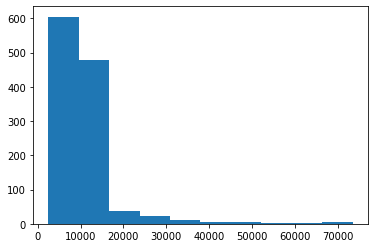

In [27]:
plt.hist(df_agg_total["CURRENT_LAP_TIME_MS"])

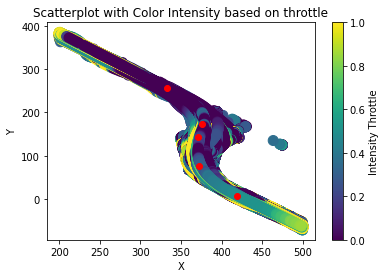

In [28]:
# Looking at the first person's behaviour
best_agg = df_agg_total.index[0]
df_test = df[df["agg"] == best_agg]

plt.scatter(df["WORLDPOSX"], df["WORLDPOSY"], c=df["THROTTLE"], cmap='viridis', s=100)
plt.scatter(df_test["WORLDPOSX"], df_test["WORLDPOSY"],color = "red")
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatterplot with Color Intensity based on throttle')
plt.colorbar(label='Intensity Throttle')
plt.show()

## Using K-Means to cluster data

In [29]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df_agg_copy = df_agg_total.drop(['Rank'], axis = 1)

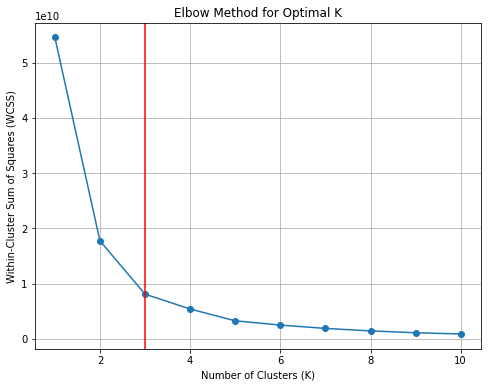

In [30]:
# Using Elbow Method and BIC for K-Means to concentrate on a cluster 

k_values = range(1, 11)  # Test K from 1 to 10 clusters (adjust the range as needed)

wcss = []
data = df_agg_copy[['CURRENT_LAP_TIME_MS', 'SPEED_KPH']].values

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker='o', linestyle='-')
plt.axvline(x=3, color='red')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()


In [31]:
def bic_score(X, labels):
  n_points = len(labels)
  n_clusters = len(set(labels))
  n_dimensions = X.shape[1]

  n_parameters = (n_clusters - 1) + (n_dimensions * n_clusters) + 1

  loglikelihood = 0
  for label_name in set(labels):
    X_cluster = X[labels == label_name]
    n_points_cluster = len(X_cluster)
    centroid = np.mean(X_cluster, axis=0)
    variance = np.sum((X_cluster - centroid) ** 2) / (len(X_cluster) - 1)
    loglikelihood += \
      n_points_cluster * np.log(n_points_cluster) \
      - n_points_cluster * np.log(n_points) \
      - n_points_cluster * n_dimensions / 2 * np.log(2 * math.pi * variance) \
      - (n_points_cluster - 1) / 2
    
  bic = loglikelihood - (n_parameters / 2) * np.log(n_points)
        
  return bic

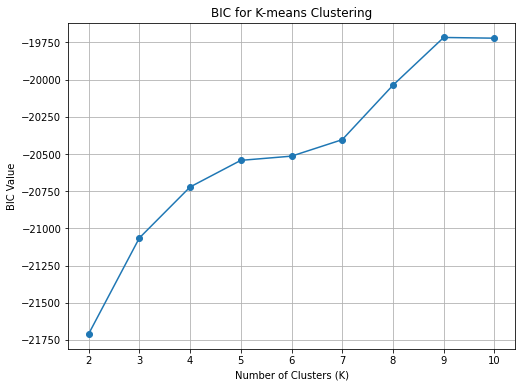

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import math

# Assuming df_agg_copy is your DataFrame
data = df_agg_copy[['CURRENT_LAP_TIME_MS', 'SPEED_KPH']].values


# Define the range of K values to test
k_values = range(2, 11)  # Test K from 2 to 10 clusters (adjust the range as needed)

# Initialize an empty list to store the BIC values
bic_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    labels = kmeans.labels_
    
    # Calculate BIC using the bic_score function
    bic = bic_score(data, labels)
    bic_values.append(bic)

# Plot the BIC values for each K
plt.figure(figsize=(8, 6))
plt.plot(k_values, bic_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('BIC Value')
plt.title('BIC for K-means Clustering')
plt.grid(True)
plt.show()


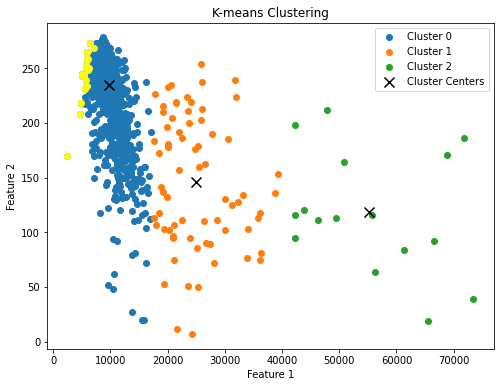

In [33]:
k = 3

kmeans = KMeans(n_clusters=k)
kmeans.fit(df_agg_copy)

cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(df_agg_copy.loc[cluster_labels == i, 'CURRENT_LAP_TIME_MS'], df_agg_copy.loc[cluster_labels == i, 'SPEED_KPH'], label=f'Cluster {i}')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='x', s=100, label='Cluster Centers')

plt.scatter(df_agg_copy['CURRENT_LAP_TIME_MS'].values[:20],df_agg_copy['SPEED_KPH'].values[:20], color = "yellow")

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.legend()
plt.show()


In [34]:
# This is the data of people who have had the best results statistically 
cluster_df = df_agg_copy[cluster_labels == 1]
cluster_df

,CURRENT_LAP_TIME_MS,SPEED_KPH
agg,,
9.729094767838011e+18_1,17818,226.0
1.7592990453090273e+18_5,17550,183.0
1.8394889979533148e+19_2,19161,215.0
8.187595475087405e+18_1,20103,233.0
2.9304924075958497e+18_2,19203,210.0
...,...,...
3.526816354683278e+18_2,36220,118.0
9.443149153309372e+18_1,36270,81.0
1.7389157642996488e+19_1,39256,153.0


In [35]:
# Goal for this part is to plot them and hopefully they are very similar!! 

## Framing a Machine Learning Problem

- Naive Baseline Model: 

- Account for the temporal changes in the dataest

In [36]:
df

,SESSION_IDENTIFIER,FRAME,LAP_NUM,SECTOR,LAP_DISTANCE,CURRENT_LAP_TIME_MS,SECTOR_1_TIME_MS,SECTOR_2_TIME_MS,LAP_TIME_MS,SECTOR_3_MS,SPEED_KPH,THROTTLE,BRAKE,GEAR,ENGINE_RPM,STEERING,YAW,PITCH,ROLL,WORLDPOSX,WORLDPOSY,WORLDPOSZ,WORLDFORWARDDIRX,WORLDFORWARDDIRY,WORLDFORWARDDIRZ,WORLDRIGHTDIRX,WORLDRIGHTDIRY,WORLDRIGHTDIRZ,agg
0,1.004555e+19,1403,1,0,243.045959,2844,29433,18320,86008.0,38255.0,315.0,1.000000,0.000000,8.0,10884.0,-0.014145,-2.312143,0.000380,-0.023934,287.412811,298.471619,1.760029,-24167.0,-12.0,-22126.0,22120.0,784.0,-24160.0,1.0045550089308107e+19_1
1,1.004555e+19,1408,1,0,266.444916,3111,29433,18320,86008.0,38255.0,314.0,0.350332,0.128359,8.0,10783.0,0.044816,-2.326019,-0.003212,-0.021614,304.667603,282.659576,1.781548,-23858.0,105.0,-22460.0,22456.0,708.0,-23851.0,1.0045550089308107e+19_1
2,1.004555e+19,1416,1,0,297.438477,3486,29433,18320,86008.0,38255.0,278.0,0.000000,0.636988,8.0,9431.0,-0.008652,-2.343246,-0.003103,-0.018019,326.941986,261.094025,1.882867,-23467.0,101.0,-22867.0,22865.0,590.0,-23462.0,1.0045550089308107e+19_1
3,1.004555e+19,1418,1,0,306.238770,3603,29433,18320,86008.0,38255.0,264.0,0.079118,0.818173,7.0,10505.0,-0.005997,-2.338133,-0.005251,-0.015977,333.254730,254.958725,1.920085,-23584.0,172.0,-22747.0,22746.0,523.0,-23579.0,1.0045550089308107e+19_1
4,1.004555e+19,1470,1,0,441.464752,6106,29433,18320,86008.0,38255.0,165.0,0.786557,0.000000,4.0,10425.0,-0.199542,2.821733,0.004594,-0.012085,370.639648,141.009048,2.337044,10302.0,-150.0,-31104.0,31103.0,395.0,10300.0,1.0045550089308107e+19_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132418,9.922656e+18,3684,2,0,689.209473,12529,36499,22353,102385.0,43533.0,190.0,0.816358,0.000000,4.0,11755.0,0.018814,-2.310662,-0.004172,0.024050,490.463654,-55.154510,3.136417,-24200.0,136.0,-22090.0,22082.0,-787.0,-24195.0,9.922655568079577e+18_2
1132419,9.922656e+18,3685,2,0,691.874512,12579,36499,22353,102385.0,43533.0,192.0,0.826383,0.000000,4.0,11850.0,0.018357,-2.313687,-0.004460,0.023015,492.426453,-56.949917,3.147111,-24133.0,146.0,-22164.0,22155.0,-754.0,-24129.0,9.922655568079577e+18_2
1132420,9.922656e+18,3686,2,0,694.560547,12629,36499,22353,102385.0,43533.0,193.0,0.820569,0.000000,4.0,11934.0,0.018448,-2.316696,-0.004235,0.022687,494.399200,-58.764996,3.157917,-24066.0,138.0,-22236.0,22228.0,-743.0,-24062.0,9.922655568079577e+18_2
1132421,9.922656e+18,3687,2,0,697.262207,12679,36499,22353,102385.0,43533.0,194.0,0.842206,0.000000,5.0,10379.0,0.018906,-2.319804,-0.003499,0.022199,496.378113,-60.596397,3.167727,-23997.0,114.0,-22311.0,22304.0,-727.0,-23993.0,9.922655568079577e+18_2


In [44]:
grouped = df.groupby(["agg"])
result = grouped["SPEED_KPH"].last()

counts = pd.DataFrame(result)
counts

,SPEED_KPH
agg,
1.00346768666644e+19_1,264.0
1.00346768666644e+19_2,264.0
1.0045550089308107e+19_1,257.0
1.0045550089308107e+19_3,262.0
1.004644701392172e+19_1,261.0
...,...
9.93719767677717e+18_3,271.0
9.943356580072892e+18_1,274.0
9.943356580072892e+18_2,273.0


In [38]:
value_counts = pd.value_counts(sorted(counts["SPEED_KPH"]))
value_counts

6       29
11      23
182     22
183     22
185     21
        ..
38       1
40       1
262      1
261      1
1426     1
Length: 259, dtype: int64

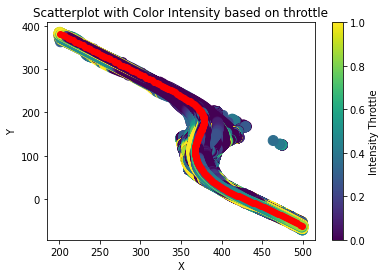

In [39]:
num = counts.index[0]
df_test = df[df["agg"] == num]

plt.scatter(df["WORLDPOSX"], df["WORLDPOSY"], c=df["THROTTLE"], cmap='viridis', s=100)
plt.scatter(df_test["WORLDPOSX"], df_test["WORLDPOSY"],color = "red")
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatterplot with Color Intensity based on throttle')
plt.colorbar(label='Intensity Throttle')
plt.show()

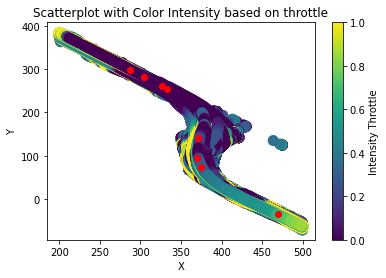

In [40]:
num = counts.index[2]
df_test = df[df["agg"] == num]

plt.scatter(df["WORLDPOSX"], df["WORLDPOSY"], c=df["THROTTLE"], cmap='viridis', s=100)
plt.scatter(df_test["WORLDPOSX"], df_test["WORLDPOSY"],color = "red")
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatterplot with Color Intensity based on throttle')
plt.colorbar(label='Intensity Throttle')
plt.show()

### Features of Machine Learning

- Point of Brake 

- Point of Throttle with the features etc

- Acceleration

In [49]:
df

,SESSION_IDENTIFIER,FRAME,LAP_NUM,SECTOR,LAP_DISTANCE,CURRENT_LAP_TIME_MS,SECTOR_1_TIME_MS,SECTOR_2_TIME_MS,LAP_TIME_MS,SECTOR_3_MS,SPEED_KPH,THROTTLE,BRAKE,GEAR,ENGINE_RPM,STEERING,YAW,PITCH,ROLL,WORLDPOSX,WORLDPOSY,WORLDPOSZ,WORLDFORWARDDIRX,WORLDFORWARDDIRY,WORLDFORWARDDIRZ,WORLDRIGHTDIRX,WORLDRIGHTDIRY,WORLDRIGHTDIRZ,agg
0,1.004555e+19,1403,1,0,243.045959,2844,29433,18320,86008.0,38255.0,315.0,1.000000,0.000000,8.0,10884.0,-0.014145,-2.312143,0.000380,-0.023934,287.412811,298.471619,1.760029,-24167.0,-12.0,-22126.0,22120.0,784.0,-24160.0,1.0045550089308107e+19_1
1,1.004555e+19,1408,1,0,266.444916,3111,29433,18320,86008.0,38255.0,314.0,0.350332,0.128359,8.0,10783.0,0.044816,-2.326019,-0.003212,-0.021614,304.667603,282.659576,1.781548,-23858.0,105.0,-22460.0,22456.0,708.0,-23851.0,1.0045550089308107e+19_1
2,1.004555e+19,1416,1,0,297.438477,3486,29433,18320,86008.0,38255.0,278.0,0.000000,0.636988,8.0,9431.0,-0.008652,-2.343246,-0.003103,-0.018019,326.941986,261.094025,1.882867,-23467.0,101.0,-22867.0,22865.0,590.0,-23462.0,1.0045550089308107e+19_1
3,1.004555e+19,1418,1,0,306.238770,3603,29433,18320,86008.0,38255.0,264.0,0.079118,0.818173,7.0,10505.0,-0.005997,-2.338133,-0.005251,-0.015977,333.254730,254.958725,1.920085,-23584.0,172.0,-22747.0,22746.0,523.0,-23579.0,1.0045550089308107e+19_1
4,1.004555e+19,1470,1,0,441.464752,6106,29433,18320,86008.0,38255.0,165.0,0.786557,0.000000,4.0,10425.0,-0.199542,2.821733,0.004594,-0.012085,370.639648,141.009048,2.337044,10302.0,-150.0,-31104.0,31103.0,395.0,10300.0,1.0045550089308107e+19_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132418,9.922656e+18,3684,2,0,689.209473,12529,36499,22353,102385.0,43533.0,190.0,0.816358,0.000000,4.0,11755.0,0.018814,-2.310662,-0.004172,0.024050,490.463654,-55.154510,3.136417,-24200.0,136.0,-22090.0,22082.0,-787.0,-24195.0,9.922655568079577e+18_2
1132419,9.922656e+18,3685,2,0,691.874512,12579,36499,22353,102385.0,43533.0,192.0,0.826383,0.000000,4.0,11850.0,0.018357,-2.313687,-0.004460,0.023015,492.426453,-56.949917,3.147111,-24133.0,146.0,-22164.0,22155.0,-754.0,-24129.0,9.922655568079577e+18_2
1132420,9.922656e+18,3686,2,0,694.560547,12629,36499,22353,102385.0,43533.0,193.0,0.820569,0.000000,4.0,11934.0,0.018448,-2.316696,-0.004235,0.022687,494.399200,-58.764996,3.157917,-24066.0,138.0,-22236.0,22228.0,-743.0,-24062.0,9.922655568079577e+18_2
1132421,9.922656e+18,3687,2,0,697.262207,12679,36499,22353,102385.0,43533.0,194.0,0.842206,0.000000,5.0,10379.0,0.018906,-2.319804,-0.003499,0.022199,496.378113,-60.596397,3.167727,-23997.0,114.0,-22311.0,22304.0,-727.0,-23993.0,9.922655568079577e+18_2


In [57]:
df_agg_total = pd.concat([time_sector0, last_time], axis = 1)
df_agg_total

,CURRENT_LAP_TIME_MS,SPEED_KPH
agg,,
1.00346768666644e+19_1,9292,264.0
1.00346768666644e+19_2,9309,264.0
1.0045550089308107e+19_1,6890,257.0
1.0045550089308107e+19_3,8175,262.0
1.004644701392172e+19_1,9768,261.0
...,...,...
9.93719767677717e+18_3,8693,271.0
9.943356580072892e+18_1,8674,274.0
9.943356580072892e+18_2,8640,273.0


In [58]:
# Adding new columns 
df_agg_total = df_agg_total.assign(
    BEFORE_ENTRY_BRAKE_X = 0, 
    BEFORE_ENTRY_BRAKE_Y = 0, 
    BEFORE_ENTRY_BRAKE_GEAR = 0, 
    BEFORE_ENTRY_BRAKE_STEERING = 0, 
    BEFORE_ENTRY_BRAKE_SPEED = 0, 
    BEFORE_ENTRY_BRAKE_RPM = 0, 
    
    WITHIN_BRAKE_X = 0, 
    WITHIN_BRAKE_Y = 0, 
    WTHIN_BRAKE_GEAR = 0, 
    WITHIN_BRAKE_STEERING = 0, 
    WITHIN_BRAKE_SPEED = 0, 
    WITHIN_BRAKE_RPM = 0, 
    
    WITHIN_THROTTLE_X = 0, 
    WITHIN_THROTTLE_Y = 0, 
    WITHIN_THROTTLE_GEAR = 0, 
    WITHIN_THROTTLE_STEERING = 0, 
    WITHIN_THROTTLE_SPEED = 0, 
    WITHIN_THROTTLE_RPM = 0, 
)

## Keeping it consistent

    for i, res in new.iterrows():
        if (res["WORLDPOSX"] < 350) & (res["WORLDPOSY"]>200):
            entry += 1
        if (350 < res["WORLDPOSX"] < 400) & (0 < res["WORLDPOSY"] < 200):
            within += 1
        if (res["WORLDPOSX"] > 400) & (res["WORLDPOSY"] < 100):
            exit += 1
    
    if (entry >= 1) & (within >= 1) & (exit >= 1):
        ls_legit.append(elem)
    

In [108]:
# For each agg, we find the point of brake, the point of throttle etc 

for i, elem in enumerate(df_agg_total.index):
    df_temp = df[df["agg"] == elem]
    
    counter_before = 0
    counter_within_brake = 0
    counter_within_throttle = 0
    
    for index, row in df_temp.iterrows():
        # BEFORE ENTRY
        if (row["WORLDPOSX"] < 350) & (row["WORLDPOSY"]>200) and (row["BRAKE"] > 0.5) and (counter_before == 0): 
            df_agg_total.loc[elem, 'BEFORE_ENTRY_BRAKE_X'] = row["WORLDPOSX"]
            df_agg_total.loc[elem, 'BEFORE_ENTRY_BRAKE_Y'] = row["WORLDPOSY"]
            df_agg_total.loc[elem, 'BEFORE_ENTRY_BRAKE_GEAR'] = row["GEAR"]
            df_agg_total.loc[elem, 'BEFORE_ENTRY_BRAKE_STEERING'] = row["STEERING"]
            df_agg_total.loc[elem, 'BEFORE_ENTRY_BRAKE_SPEED'] = row["SPEED_KPH"]
            df_agg_total.loc[elem, 'BEFORE_ENTRY_BRAKE_RPM'] = row["ENGINE_RPM"]
            counter_before = 1

        
        # WITHIN BRAKE 
        if (350 < row["WORLDPOSX"] < 400) & (0 < row["WORLDPOSY"] < 200) and row["BRAKE"] > 0.5 and (counter_within_brake == 0):
            df_agg_total.loc[elem, 'WITHIN_BRAKE_X'] = row["WORLDPOSX"]
            df_agg_total.loc[elem, 'WITHIN_BRAKE_Y'] = row["WORLDPOSY"]
            df_agg_total.loc[elem, 'WITHIN_BRAKE_GEAR'] = row["GEAR"]
            df_agg_total.loc[elem, 'WITHIN_BRAKE_STEERING'] = row["STEERING"]
            df_agg_total.loc[elem, 'WITHIN_BRAKE_SPEED'] = row["SPEED_KPH"]
            df_agg_total.loc[elem, 'WITHIN_BRAKE_RPM'] = row["ENGINE_RPM"]
            counter_within_brake = 1

        
        # WITHIN THROTTLE  
        if (row["WORLDPOSX"] > 400) & (row["WORLDPOSY"] < 100) and row["THROTTLE"] > 0.5 and (counter_within_throttle == 0):
            df_agg_total.loc[elem, 'WITHIN_THROTTLE_X'] = row["WORLDPOSX"]
            df_agg_total.loc[elem, 'WITHIN_THROTTLE_Y'] = row["WORLDPOSY"]
            df_agg_total.loc[elem, 'WITHIN_THROTTLE_GEAR'] = row["GEAR"]
            df_agg_total.loc[elem, 'WITHIN_THROTTLE_STEERING'] = row["STEERING"]
            df_agg_total.loc[elem, 'WITHIN_THROTTLE_SPEED'] = row["SPEED_KPH"]
            df_agg_total.loc[elem, 'WITHIN_THROTTLE_RPM'] = row["ENGINE_RPM"]
            counter_within_throttle = 1


In [110]:
pd.set_option('display.max_rows', None)

df_agg_total

,CURRENT_LAP_TIME_MS,SPEED_KPH,BEFORE_ENTRY_BRAKE_X,BEFORE_ENTRY_BRAKE_Y,BEFORE_ENTRY_BRAKE_GEAR,BEFORE_ENTRY_BRAKE_STEERING,BEFORE_ENTRY_BRAKE_SPEED,BEFORE_ENTRY_BRAKE_RPM,WITHIN_BRAKE_X,WITHIN_BRAKE_Y,WTHIN_BRAKE_GEAR,WITHIN_BRAKE_STEERING,WITHIN_BRAKE_SPEED,WITHIN_BRAKE_RPM,WITHIN_THROTTLE_X,WITHIN_THROTTLE_Y,WITHIN_THROTTLE_GEAR,WITHIN_THROTTLE_STEERING,WITHIN_THROTTLE_SPEED,WITHIN_THROTTLE_RPM,WITHIN_BRAKE_GEAR
agg,,,,,,,,,,,,,,,,,,,,,
1.00346768666644e+19_1,9292,264.0,317.043945,270.647095,8,0.004349,314,10905,375.840179,198.128357,0,0.447105,147,8550,400.859924,24.993776,5,-0.143786,215,11436,4.0
1.00346768666644e+19_2,9309,264.0,0.000000,0.000000,0,0.000000,0,0,0.000000,0.000000,0,0.000000,0,0,0.000000,0.000000,0,0.000000,0,0,NaN
1.0045550089308107e+19_1,6890,257.0,0.000000,0.000000,0,0.000000,0,0,0.000000,0.000000,0,0.000000,0,0,0.000000,0.000000,0,0.000000,0,0,NaN
1.0045550089308107e+19_3,8175,262.0,0.000000,0.000000,0,0.000000,0,0,0.000000,0.000000,0,0.000000,0,0,0.000000,0.000000,0,0.000000,0,0,NaN
1.004644701392172e+19_1,9768,261.0,0.000000,0.000000,0,0.000000,0,0,0.000000,0.000000,0,0.000000,0,0,0.000000,0.000000,0,0.000000,0,0,NaN
1.004644701392172e+19_2,9142,266.0,0.000000,0.000000,0,0.000000,0,0,0.000000,0.000000,0,0.000000,0,0,0.000000,0.000000,0,0.000000,0,0,NaN
1.004644701392172e+19_3,9051,266.0,0.000000,0.000000,0,0.000000,0,0,0.000000,0.000000,0,0.000000,0,0,0.000000,0.000000,0,0.000000,0,0,NaN
1.014601560503485e+19_1,7666,158.0,0.000000,0.000000,0,0.000000,0,0,0.000000,0.000000,0,0.000000,0,0,0.000000,0.000000,0,0.000000,0,0,NaN
1.0167661446319475e+19_1,12046,159.0,0.000000,0.000000,0,0.000000,0,0,0.000000,0.000000,0,0.000000,0,0,0.000000,0.000000,0,0.000000,0,0,NaN




Braking point:

- Braking intensity is different 

- A braking point is the minute which you touch the brake and the car starts to decelerate. 

- Max feet overlap (take foot off accelerator but sometimes he will keep 

--> Millisecond you apply the brake (where am I doing that for what point and for how long am I doing the braking). Don't do a midpoint. You need to know exactly where it is... 
-> He rarely puts his foot flat on the break (dont brake too late => brake too late will make it slow down more). 


Issac's Questions:

- Angle (steering angle for front wheels)
- Extrapolate and work out the WORLDPOSITION coordinates => under the motion data, we do have the WORLDFORWARDX,Y and Z (angle car is pointing) 
- Over several frames you can see if there is a directional movement or if there is slippage as you call it. 
- That would add something to ur project if you add that route 

Relationship between 

(1 to -1) => 
You've got your pitch and roll. IDK if they fit in this model specifically... 


WORLD FORWARD, X and Z => standard deviation different. 

* Calculate the apex (take cornering data figure out where the apex was) => 



In [42]:
df

,SESSION_IDENTIFIER,FRAME,LAP_NUM,SECTOR,LAP_DISTANCE,CURRENT_LAP_TIME_MS,SECTOR_1_TIME_MS,SECTOR_2_TIME_MS,LAP_TIME_MS,SECTOR_3_MS,SPEED_KPH,THROTTLE,BRAKE,GEAR,ENGINE_RPM,STEERING,YAW,PITCH,ROLL,WORLDPOSX,WORLDPOSY,WORLDPOSZ,WORLDFORWARDDIRX,WORLDFORWARDDIRY,WORLDFORWARDDIRZ,WORLDRIGHTDIRX,WORLDRIGHTDIRY,WORLDRIGHTDIRZ,agg
0,1.004555e+19,1403,1,0,243.045959,2844,29433,18320,86008.0,38255.0,315.0,1.000000,0.000000,8.0,10884.0,-0.014145,-2.312143,0.000380,-0.023934,287.412811,298.471619,1.760029,-24167.0,-12.0,-22126.0,22120.0,784.0,-24160.0,1.0045550089308107e+19_1
1,1.004555e+19,1408,1,0,266.444916,3111,29433,18320,86008.0,38255.0,314.0,0.350332,0.128359,8.0,10783.0,0.044816,-2.326019,-0.003212,-0.021614,304.667603,282.659576,1.781548,-23858.0,105.0,-22460.0,22456.0,708.0,-23851.0,1.0045550089308107e+19_1
2,1.004555e+19,1416,1,0,297.438477,3486,29433,18320,86008.0,38255.0,278.0,0.000000,0.636988,8.0,9431.0,-0.008652,-2.343246,-0.003103,-0.018019,326.941986,261.094025,1.882867,-23467.0,101.0,-22867.0,22865.0,590.0,-23462.0,1.0045550089308107e+19_1
3,1.004555e+19,1418,1,0,306.238770,3603,29433,18320,86008.0,38255.0,264.0,0.079118,0.818173,7.0,10505.0,-0.005997,-2.338133,-0.005251,-0.015977,333.254730,254.958725,1.920085,-23584.0,172.0,-22747.0,22746.0,523.0,-23579.0,1.0045550089308107e+19_1
4,1.004555e+19,1470,1,0,441.464752,6106,29433,18320,86008.0,38255.0,165.0,0.786557,0.000000,4.0,10425.0,-0.199542,2.821733,0.004594,-0.012085,370.639648,141.009048,2.337044,10302.0,-150.0,-31104.0,31103.0,395.0,10300.0,1.0045550089308107e+19_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132418,9.922656e+18,3684,2,0,689.209473,12529,36499,22353,102385.0,43533.0,190.0,0.816358,0.000000,4.0,11755.0,0.018814,-2.310662,-0.004172,0.024050,490.463654,-55.154510,3.136417,-24200.0,136.0,-22090.0,22082.0,-787.0,-24195.0,9.922655568079577e+18_2
1132419,9.922656e+18,3685,2,0,691.874512,12579,36499,22353,102385.0,43533.0,192.0,0.826383,0.000000,4.0,11850.0,0.018357,-2.313687,-0.004460,0.023015,492.426453,-56.949917,3.147111,-24133.0,146.0,-22164.0,22155.0,-754.0,-24129.0,9.922655568079577e+18_2
1132420,9.922656e+18,3686,2,0,694.560547,12629,36499,22353,102385.0,43533.0,193.0,0.820569,0.000000,4.0,11934.0,0.018448,-2.316696,-0.004235,0.022687,494.399200,-58.764996,3.157917,-24066.0,138.0,-22236.0,22228.0,-743.0,-24062.0,9.922655568079577e+18_2
1132421,9.922656e+18,3687,2,0,697.262207,12679,36499,22353,102385.0,43533.0,194.0,0.842206,0.000000,5.0,10379.0,0.018906,-2.319804,-0.003499,0.022199,496.378113,-60.596397,3.167727,-23997.0,114.0,-22311.0,22304.0,-727.0,-23993.0,9.922655568079577e+18_2
